## SORAN AUTOMOBILE SALES ANALYSIS

In [2]:
#pip install missingno

In [3]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
sns.set()
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew, kurtosis

In [4]:
# Load data and view top 5 

Carsales = pd.read_excel(r"Car_Sales.xlsx")
Carsales

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class    NaN  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9576 rows x 10 columns]

#### Overview of dataset

In [5]:
Carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [6]:
# Dimensionality :To check the Dimension of our dataset
Carsales.shape

(9576, 10)

In [7]:
# statistical summary of the dataset
Carsales.describe().astype(int)

price  mileage  engV  year
count    9576     9576  9142  9576
mean    15633      138     2  2006
std     24106       98     5     7
min         0        0     0  1953
25%      4999       70     1  2004
50%      9200      128     2  2008
75%     16700      194     2  2012
max    547800      999    99  2016

In [8]:
#missing value count : To check for the missing values in thed dataset
Carsales.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

- We have a huge chunk of missing values in the dataset, sum of 434 missing values in engV and sum of 511 in drive

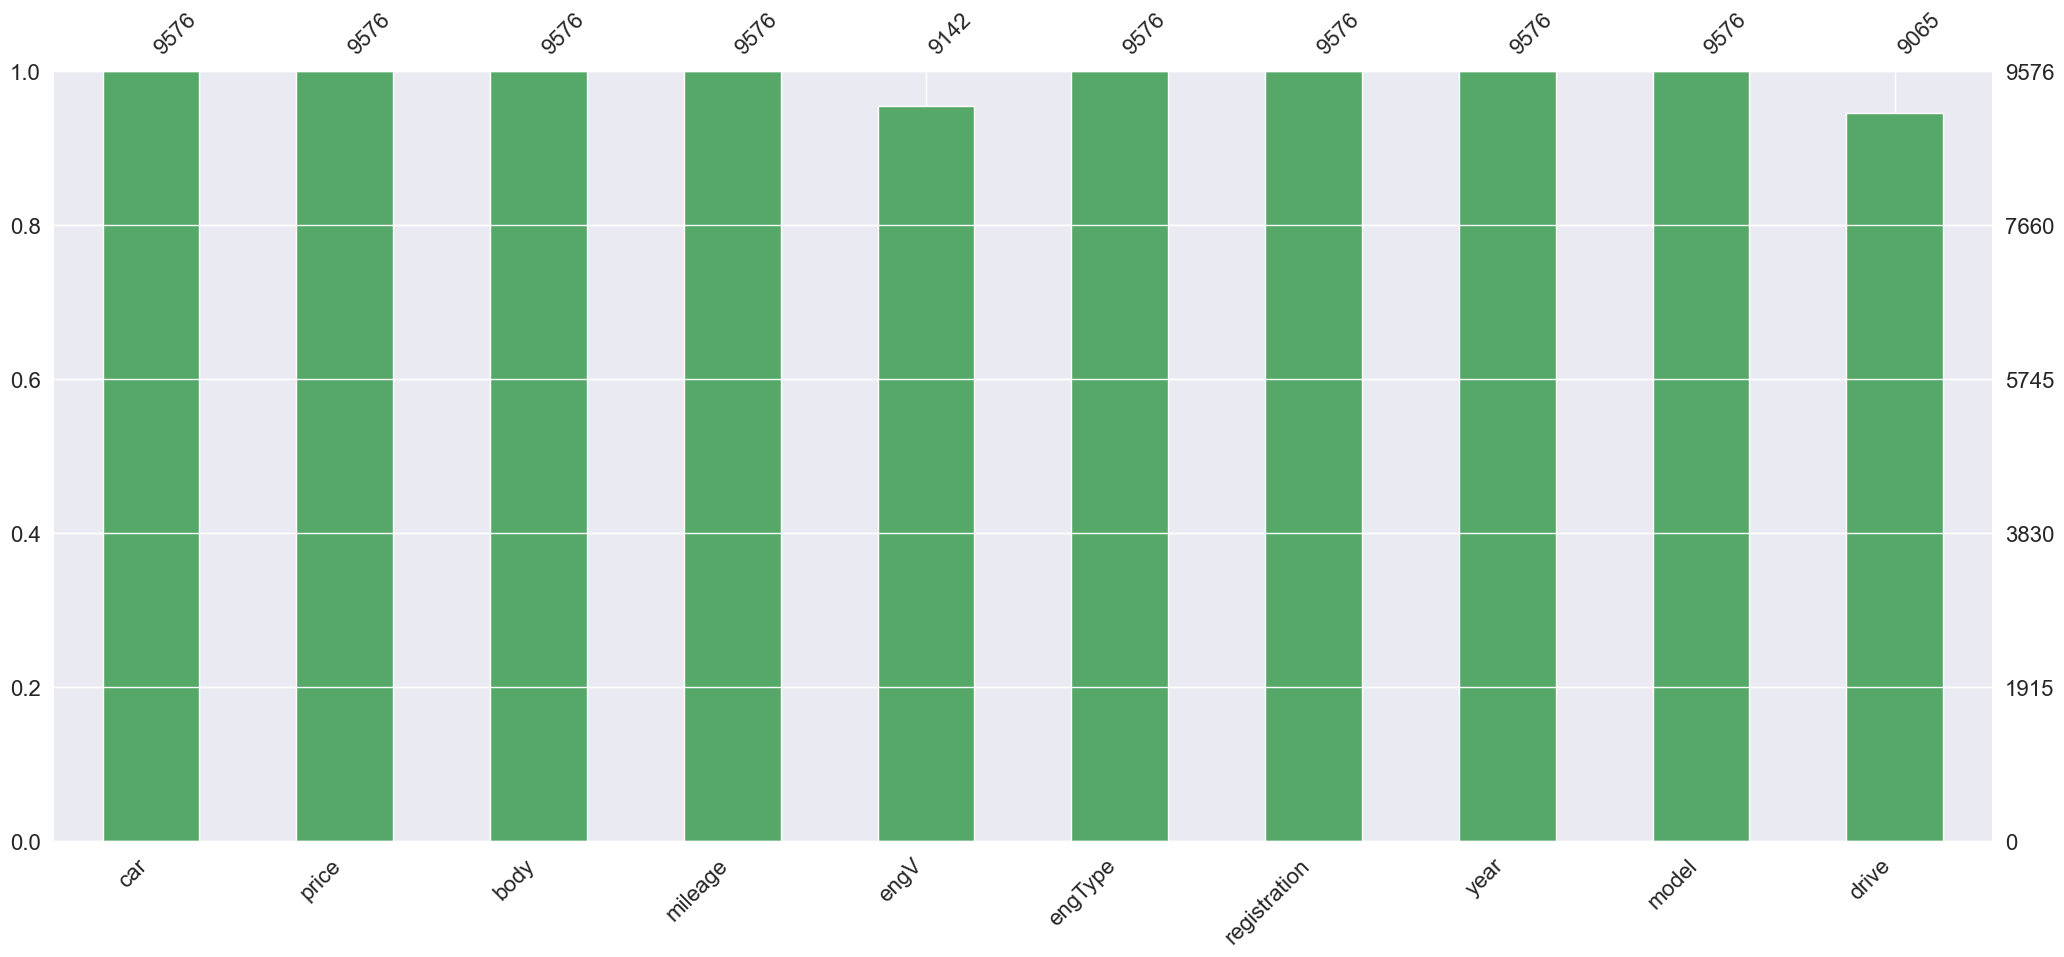

In [9]:
# Visualizing the missing data for a clearer view
msno.bar(Carsales, color='g');

- The engV and drive have unequal bars compared to other variables. So its clear where our missing values are

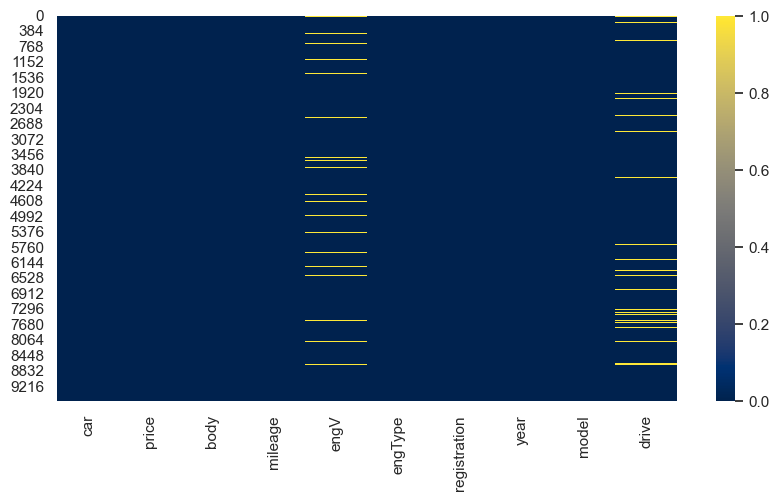

In [10]:
# Another way to visualize the missing Data
plt.figure(figsize=(10,5))
sns.heatmap(Carsales.isnull(), cbar=True, cmap='cividis');

- Another clear view of the missing values using the Heatmap, pointing directly to where we have the missing values in the dataset


##### Preprofiling
- This shows the Raw Broad Overview of the dataset

In [49]:
#pip install -U pandas-profiling

In [12]:
from pandas_profiling import ProfileReport

In [13]:
carsales_profile = ProfileReport(Carsales, title='Carsales_Raw_Overview')
carsales_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### Data Cleaning

In [14]:
# make a copy of df - .copy()
carsales1 = Carsales.copy()
carsales1.head(3)

car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   

   year    model drive  
0  2010     Kuga  full  
1  2011  E-Class  rear  
2  2008   CL 550  rear

##### Rename column names

In [15]:
# Displaying the Raw Dataset Columns
Carsales.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [16]:
Carsales.columns = ['Car_brand', 'Price', 'BodyType', 'Mileage', 'EngineValue', 'EngineType', 'Registration',
       'Year', 'CarModel', 'DriveType']
Carsales.head(3)

Car_brand    Price   BodyType  Mileage  EngineValue EngineType  \
0           Ford  15500.0  crossover       68          2.5        Gas   
1  Mercedes-Benz  20500.0      sedan      173          1.8        Gas   
2  Mercedes-Benz  35000.0      other      135          5.5     Petrol   

  Registration  Year CarModel DriveType  
0          yes  2010     Kuga      full  
1          yes  2011  E-Class      rear  
2          yes  2008   CL 550      rear

## Handling Duplicates


In [17]:
# Displaying the duplicate values we have in the dataset
Carsales.duplicated().sum()

113

In [18]:
# drop duplicate rows
Carsales.drop_duplicates(inplace=True)

In [19]:
Carsales.shape

(9463, 10)

In [20]:
# Double checking for duplicate values
Carsales.duplicated().sum()

0

## Handling missing values

##### Replacing the missing data in EngineValue and DriveType

In [21]:
Carsales.isnull().sum()

Car_brand         0
Price             0
BodyType          0
Mileage           0
EngineValue     434
EngineType        0
Registration      0
Year              0
CarModel          0
DriveType       510
dtype: int64

In [22]:
# filling missing values for drive : Using the mode of the DriveType
Carsales["DriveType"].mode()

0    front
Name: DriveType, dtype: object

In [23]:
#fill missing values with the mode = "front"
Carsales["DriveType"] =  Carsales["DriveType"].fillna('front')

In [24]:
#fill missing values for EngineValue with the median
Carsales["EngineValue"] = Carsales.groupby(['Car_brand', 'BodyType'])['EngineValue'].transform(lambda x: x.fillna(x.median()))

In [25]:
# Double checking to see if the missing values are sorted
Carsales.isnull().sum()

Car_brand        0
Price            0
BodyType         0
Mileage          0
EngineValue     10
EngineType       0
Registration     0
Year             0
CarModel         0
DriveType        0
dtype: int64

In [26]:
# checking for the left-over missing values in EngineValue

Carsales[Carsales.EngineValue.isnull()]

Car_brand     Price   BodyType  Mileage  EngineValue EngineType  \
319      Tesla   58000.0      hatch       52          NaN      Other   
1437     Tesla  178500.0  crossover        0          NaN      Other   
2486     Tesla  185000.0  crossover        1          NaN      Other   
5084       GAZ       0.0  crossover        1          NaN     Petrol   
6773       UAZ    3000.0      other        1          NaN      Other   
8569     Tesla  176900.0  crossover        0          NaN      Other   
8824    Fisker       0.0      other      100          NaN      Other   
8905   Changan    6028.0  crossover      101          NaN      Other   
9360    Barkas    5500.0        van       80          NaN     Petrol   
9566       UAZ     850.0        van      255          NaN      Other   

     Registration  Year CarModel DriveType  
319           yes  2013  Model S     front  
1437          yes  2016  Model X      full  
2486          yes  2016  Model X      full  
5084          yes  1963       69      full  
6773          yes  1985     3303      full  
8569          yes  2016  Model X      full  
8824          yes  2001    Karma     front  
8905          yes  2005    Ideal     front  
9360          yes  2015    B1000     front  
9566          yes  1981     3962     front

In [27]:
#drop the remaining NaN values
Carsales.dropna(subset=['EngineValue'],inplace=True)
Carsales.isnull().sum()

Car_brand       0
Price           0
BodyType        0
Mileage         0
EngineValue     0
EngineType      0
Registration    0
Year            0
CarModel        0
DriveType       0
dtype: int64

##### Now its clear that the missing values sorted

In [28]:
Carsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9453 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_brand     9453 non-null   object 
 1   Price         9453 non-null   float64
 2   BodyType      9453 non-null   object 
 3   Mileage       9453 non-null   int64  
 4   EngineValue   9453 non-null   float64
 5   EngineType    9453 non-null   object 
 6   Registration  9453 non-null   object 
 7   Year          9453 non-null   int64  
 8   CarModel      9453 non-null   object 
 9   DriveType     9453 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 812.4+ KB


In [29]:
Carsales.Price[Carsales.Price==0].count()

238

In [30]:
# Dropping entries with price <= 0 

Carsales = Carsales.drop(Carsales[Carsales.Price <=0].index)

In [31]:
Carsales.Price[Carsales.Price==0].count()

0

In [32]:
Carsales.Mileage[Carsales.Mileage==0].count()

281

In [212]:
# Dropping entries with Mileage <= 0 

Carsales = Carsales.drop(Carsales[Carsales.Mileage <=0].index)

In [213]:
Carsales.Mileage[Carsales.Mileage==0].count()

0

###### Post profiling

In [33]:
carsales_profile2 = ProfileReport(Carsales, title='Carsales_after_data_cleaning')
carsales_profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
Carsales.head()

Car_brand    Price   BodyType  Mileage  EngineValue EngineType  \
0           Ford  15500.0  crossover       68          2.5        Gas   
1  Mercedes-Benz  20500.0      sedan      173          1.8        Gas   
2  Mercedes-Benz  35000.0      other      135          5.5     Petrol   
3  Mercedes-Benz  17800.0        van      162          1.8     Diesel   
4  Mercedes-Benz  33000.0      vagon       91          2.3      Other   

  Registration  Year CarModel DriveType  
0          yes  2010     Kuga      full  
1          yes  2011  E-Class      rear  
2          yes  2008   CL 550      rear  
3          yes  2012    B 180     front  
4          yes  2013  E-Class     front

### Exploratory Data Analysis Of Car Sales

#### Questions:

* Which type of cars are sold maximum?
* What is the correlation between price and mileage?
* How many cars are registered?
* Does the registeration status influence car price?
* What is the car price distribution based on Engine Value?
* Which car type has the highest pricing?

In [ ]:
# 1. Which type of cars are sold most?

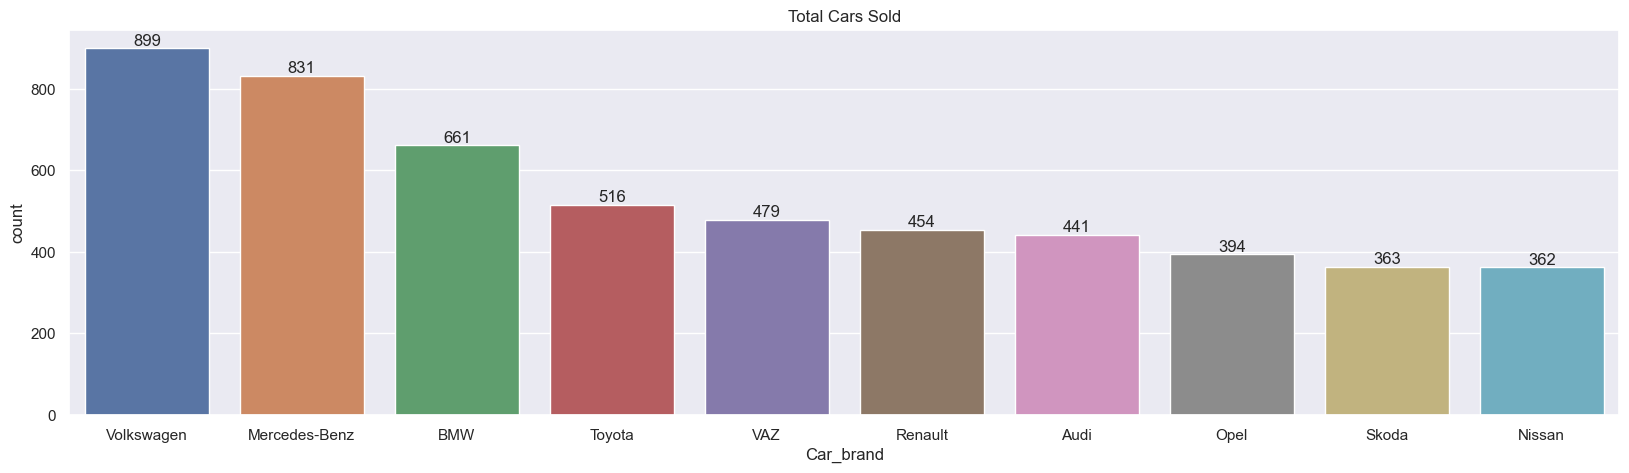

In [36]:
# Car brand that's most sold

plt.figure(figsize=(20,5))
plt.title('Total Cars Sold')

ax = Carsales["Car_brand"].value_counts().head(10)
Max_sales = sns.countplot(x="Car_brand", data=Carsales, order=ax.index)
values = Carsales["Car_brand"].order=ax.values
Max_sales.bar_label(container=Max_sales.containers[0], labels=values);

- Volkswagen is the most sold car, folllowed by Mercedes-Bens and BMW. The Chat above shows the top 10 most sold cars

In [147]:
# 2. What is the correlation between price and mileage?

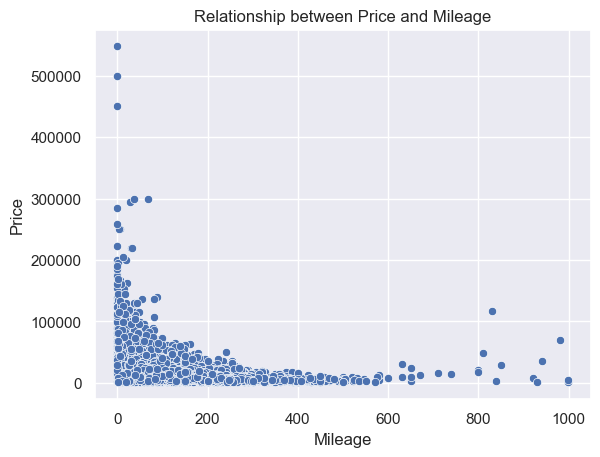

In [37]:
plt.title('Relationship between Price and Mileage')
sns.scatterplot(x='Mileage', y='Price', data=Carsales);

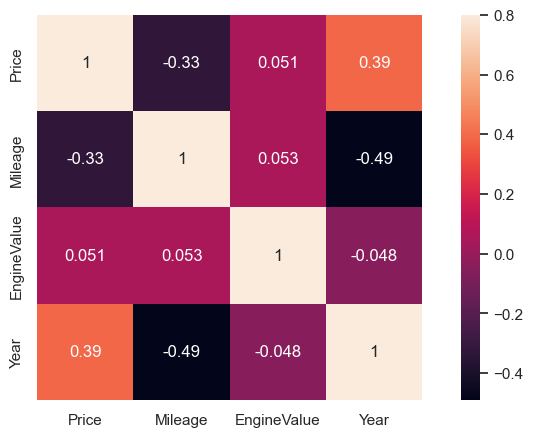

In [38]:
# Correlation
a = Carsales.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(a, vmax=.8, square=True, annot=True);

- From the relationship plot above between 'price and mileage', it shows that there's a negative relationship between the two.
- Backing it up with the correlation heatmap directly above it clearly dispace the negative correlation of (-0.46) between the price and the mileage.
- The strong relationship/correlation is between the Price and Year. This means that generally the Car Price is strongly influenced by the year.

In [175]:
# 3. How many cars are registered?

In [39]:
Carsales["Registration"].value_counts()

yes    8661
no      554
Name: Registration, dtype: int64

In [ ]:
# 4. Does the registration status influence car price?.

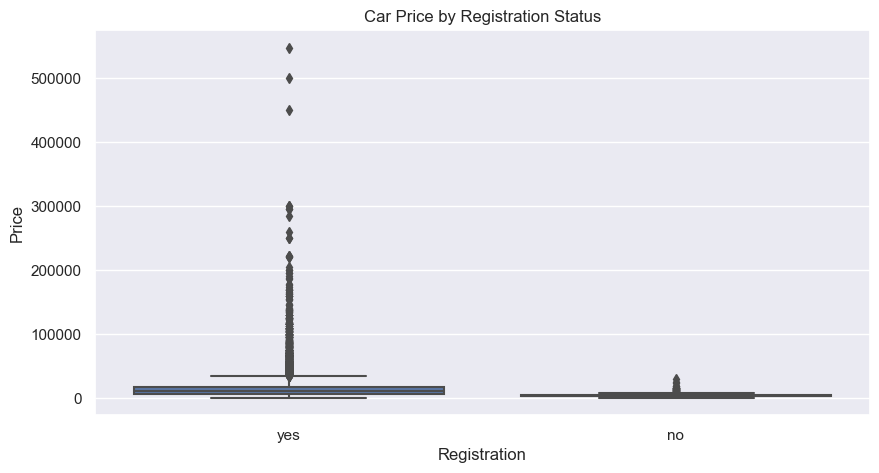

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Registration',y='Price',data=Carsales)
plt.title("Car Price by Registration Status");

- Yes! The Registered cars are of high Price compare to Unregistered cars

In [41]:
Carsales.tail(10)

Car_brand    Price   BodyType  Mileage  EngineValue EngineType  \
9565  Mercedes-Benz   8900.0      hatch      155          1.5     Petrol   
9567           Jeep  13990.0  crossover      210          3.0     Diesel   
9568  Mercedes-Benz   5000.0      vagon      248          2.0        Gas   
9569     Volkswagen  18000.0  crossover      155          2.0     Diesel   
9570         Toyota  14474.0  crossover      115          2.0     Petrol   
9571        Hyundai  14500.0  crossover      140          2.0        Gas   
9572     Volkswagen   2200.0      vagon      150          1.6     Petrol   
9573  Mercedes-Benz  18500.0  crossover      180          3.5     Petrol   
9574          Lexus  16999.0      sedan      150          3.5        Gas   
9575           Audi  22500.0      other       71          3.6     Petrol   

     Registration  Year        CarModel DriveType  
9565          yes  2005           A 150     front  
9567          yes  2006  Grand Cherokee      full  
9568          yes  1996         E-Class      rear  
9569          yes  2011          Tiguan      full  
9570          yes  2007           Rav 4      full  
9571          yes  2011          Tucson     front  
9572          yes  1986       Passat B2     front  
9573          yes  2008          ML 350      full  
9574          yes  2008          ES 350     front  
9575          yes  2007              Q7      full

In [ ]:
# 5. What is the car price distribution based on Engine Value?

In [42]:
# Count of total Engine Value

Carsales['EngineValue'].value_counts()

2.00     1548
1.60     1250
1.50      729
3.00      627
1.80      597
         ... 
1.78        1
1.36        1
55.00       1
1.59        1
74.00       1
Name: EngineValue, Length: 119, dtype: int64

In [43]:
# Each Engine Value by Price

EngVal = Carsales.groupby('EngineValue')['Price'].sum().reset_index().head(20)
EngVal

EngineValue         Price
0          0.10  5.400000e+04
1          0.11  3.340000e+04
2          0.14  2.430000e+04
3          0.60  6.579900e+04
4          0.65  3.888800e+04
5          0.70  1.529240e+06
6          0.80  1.390940e+05
7          0.90  3.529889e+04
8          1.00  8.300753e+05
9          1.10  1.249419e+05
10         1.12  5.800000e+03
11         1.20  1.219030e+06
12         1.23  8.900000e+03
13         1.24  5.799000e+03
14         1.25  9.431099e+04
15         1.30  1.076508e+06
16         1.31  5.700000e+03
17         1.33  3.059409e+04
18         1.34  9.800000e+03
19         1.35  1.555000e+03

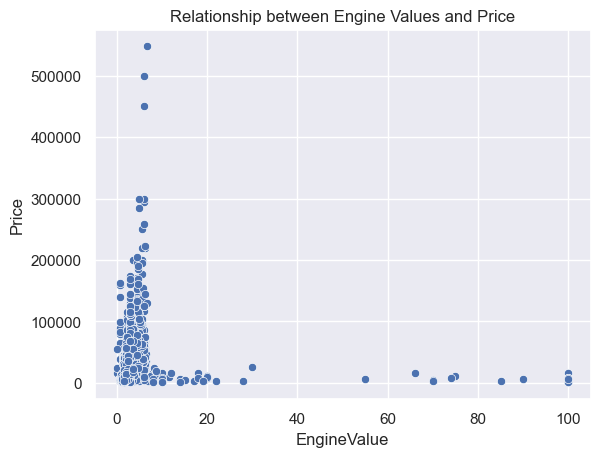

In [45]:
# Distribution of Engine Values by Price

plt.title('Relationship between Engine Values and Price')

sns.scatterplot(x='EngineValue', y='Price', data=Carsales);

- This shows there's a negative relationship between the price and the Engine Value

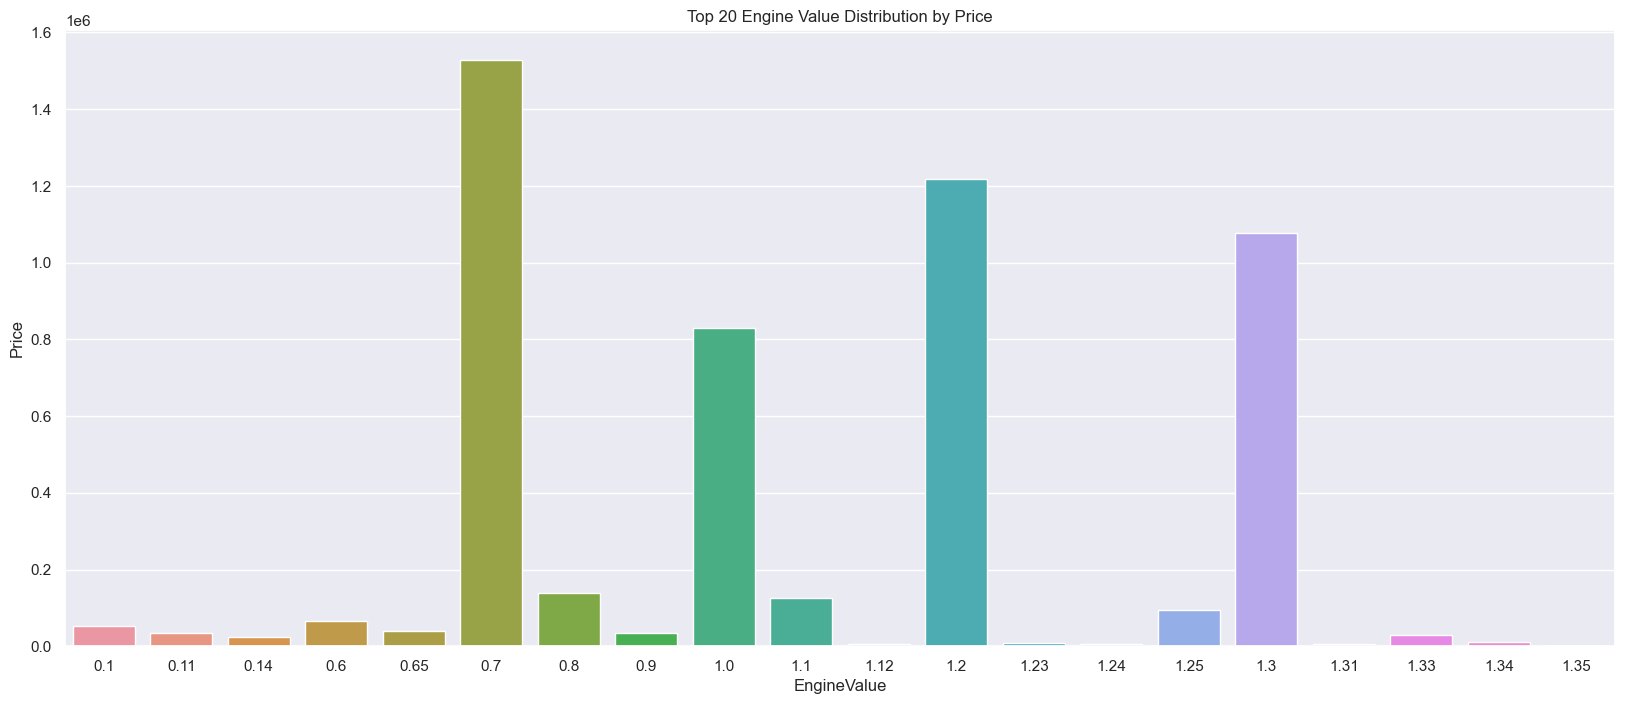

In [47]:
# Top 20 Engine Value distribution by Price

plt.figure(figsize=(20,8))
plt.title('Top 20 Engine Value Distribution by Price')
sns.barplot(x='EngineValue', y='Price', data=EngVal);

- From the barplot chart it also clearly shows theres no even or positive distribution between the Price and Engine Value by this I mean the Engine Value can be high and the Price low, also the Engine Value can be Low and the Price high

In [ ]:
# 6. Which car type has the highest pricing?

In [48]:
High_Pricing_Car = Carsales.loc[Carsales["Price"] == Carsales['Price'].max(), ['Car_brand','Price','BodyType', 'Mileage', 'EngineValue', 'EngineType','Registration', 'Year','CarModel','DriveType']]
High_Pricing_Car

Car_brand     Price BodyType  Mileage  EngineValue EngineType  \
7621   Bentley  547800.0    sedan        0         6.75     Petrol   

     Registration  Year  CarModel DriveType  
7621          yes  2016  Mulsanne      rear